In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

2022-12-04 07:34:50.985024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-04 07:34:50.985112: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from typing import NamedTuple

# PEAKS FUNCTION

In [3]:
def peaks(x):
    x = x.T
    F = 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2) - 10*(x[0]/5 - x[0]**3 - x[1]**5) * np.exp(-x[0]**2-x[1]**2) - 1/3*np.exp(-(x[0]+1)**2 - x[1]**2)
    return F

x = np.linspace(0,10,num=100)
y = np.linspace(0,10,num=100)
[x,y] = np.meshgrid(x,y)


/tmp/ipykernel_3619/215753308.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


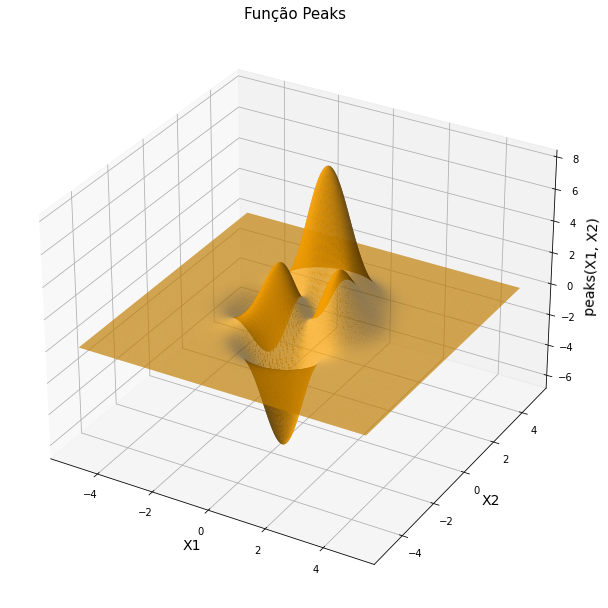

In [4]:
x1 = x2 = np.linspace(-5, 5, 300)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Peaks', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [peaks(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

In [273]:
class particle(NamedTuple):
    pos : list
    vel : list
    pbest : list
        
class SWARM:
    def __init__(self, N,V,W,C1,C2,loop,X,init):
        self.particles = []
        self.V =V
        self.W = W
        self.C1 =np.random.uniform(C1[0],C1[1])
        self.C2 = np.random.uniform(C2[0],C2[1])
        self.N = N
        self.gbest = init
        self.valueFunction = []
        self.loop = loop
        self.X = X
        
        for x in range(N):
            rand1 = np.random.uniform(-X[0],X[1])
            rand2 = np.random.uniform(-V[0],V[1])
            aux = particle([rand1,rand1], [rand2,rand2], init)
            
            self.particles.append(aux)
            

        
    def reflectV(self,v1,x1):
    
        if (v1 > self.V[1]):
            return -self.V[1]
        elif v1 < self.V[0] :
            return -self.V[0]
        else:
            return v1
        
    def reflectX(self,x1):
        if (x1 > self.X[1]):
            return (-(x1 - self.X[1]))
        elif (x1 < self.X[0]):
            return (-(x1 - self.X[0]))
        else:
            return x1
        
    def updateVaux(self, i, j,p1,p2,w):
        try:
            aux = w*self.particles[i].vel[j]  + (p1*self.C1) *(np.array(self.particles[i].pbest[j]) - np.array(self.particles[i].pos[j])) +(p2*self.C2)*(np.array(self.gbest[j]) - np.array(self.particles[i].pos[j]))
           
            return aux
        
        except NameError:
            print(NameError)
            
            
    def updateV(self,w):
        for qtd in range(self.N):
            for qtd2 in range(2):
                p1 = np.random.random()
                p2 = np.random.random()
                vaux = self.updateVaux(qtd,qtd2,p1,p2,w)
                    
                self.particles[qtd].vel[qtd2] = self.reflectV(vaux, self.particles[qtd].pos[qtd2])
                
    def getGBest(self,function):
        aux = peaks(np.array(self.particles[0].pos))
        best = self.particles[0].pos
        
        for k in range(self.N):
            aux2 = function(np.array(self.particles[k].pos))
            
            if (aux2 < aux):
                best = self.particles[k].pos
                aux = aux2
            
        return best
    
    
    def updateX(self):
        for qtd in range(self.N):
            for qtd2 in range(2):
                aux = self.particles[qtd].pos[qtd2] + self.particles[qtd].vel[qtd2] 
                self.particles[qtd].pos[qtd2] = self.reflectX(aux)
                
    
    def swarm(self, function):
        j = 0
        while(True):
            aux = self.getGBest(function)
           
            if function(np.array(aux)) < function(np.array(self.gbest)):
                self.gbest[0] = aux[0]
                self.gbest[1] = aux[1]

               
            
#             print(round(peaks(np.array(aux)),4), round(peaks(np.array(self.gbest)),4))    
            self.valueFunction.append(function(np.array(self.gbest)))
            
            for n in range(self.N):
                # Valor da particula perante a função peaks
                value = function(np.array(self.particles[n].pos))
                
                # Valor da melhor posicao da particula perante a função peaks
                value2 = function(np.array(self.particles[n].pbest))
                
                # Atualizar a a melhor posicao
                if (value < value2):
                    self.particles[n].pbest[0] = self.particles[n].pos[0]
                    self.particles[n].pbest[1] = self.particles[n].pos[1]
                   
                
                w = 0.7 - j*(0.7 - 0.3)/loop
                

                self.updateV(w)
                self.updateX()
                
            vetorPart = np.zeros((2,self.N))
            for i in range(self.N):
                vetorPart[0][i] = self.particles[i].pos[0]
                vetorPart[1][i] = self.particles[i].pos[1]
                
            

                
            plt.plot(vetorPart[0], vetorPart[1],'o')
            plt.plot(self.gbest[0], self.gbest[1],'rv')
            plt.ylim(-6,6)
            plt.xlim(-6,6)
            plt.title(f'Geracao {j}')
                
            filename = f'{j}.png'
            filenames.append(filename)
    
            # save frame
            plt.savefig(filename)
            plt.close()    
            
            
            j = j + 1
            if j > loop:
                break
        

In [338]:
filenames = []
best = 9999
loop = 100
init = [4,2]
N = 50
bestSwarm = SWARM(N,[0.1,0.2],[0.3, 0.7],[0.9,1],[0.5,1.5],loop,[-5,5],init)
for k in range(1):
    test = SWARM(N,[0.2,0.7],[0.3, 0.7],[0.5,1.5],[0.5,1.5],loop,[-5,5],init)
    test.swarm(peaks)
    print(peaks(np.array(test.gbest)))
    if peaks(np.array(test.gbest)) < best :
        best = peaks(np.array(test.gbest)) 
        bestSwarm = test

-6.550218557338435


In [339]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

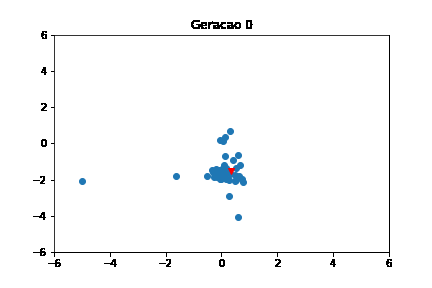

In [340]:
from IPython.display import Image
display(Image(data=open('mygif.gif','rb').read(), format='png'))

In [341]:
bestSwarm.gbest

[0.23401787676162683, -1.6312811085854035]

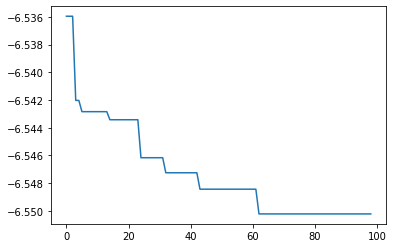

In [345]:
plt.plot(bestSwarm.valueFunction[1:100])

# RASTRIGIN FUNCTION

In [253]:
def rastrigin(x):  # objective function
    x = x.reshape(1, -1).T
    Q = np.eye(len(x))
    X = Q.dot(x)

    n = len(X)
    F = 0
    
    for i in range(n):
        F = F + X[i]**2 - 10*np.cos(2*np.pi*X[i])
    
    return F[0]

/tmp/ipykernel_3619/605340255.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


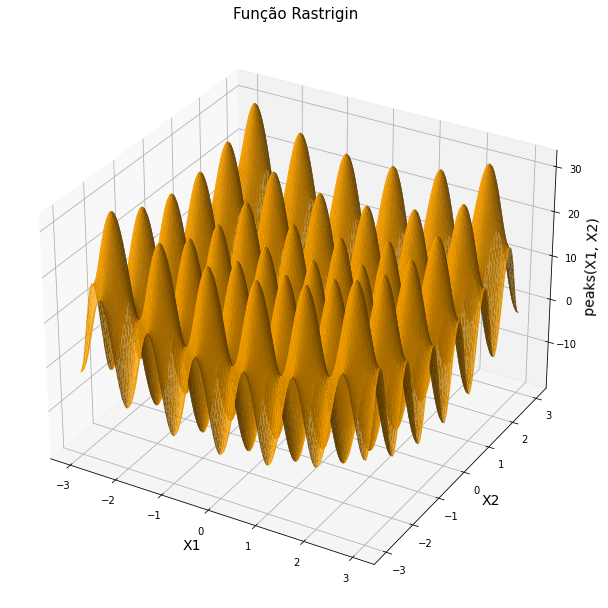

In [254]:
x1 = x2 = np.linspace(-3, 3, 150)
x_p = np.array(list(product(x1,x2)))


font_labels = {'fontsize': 14, 'fontweight': 150}

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.set_title('Função Rastrigin', fontdict={'fontsize':15})
ax.set_xlabel('X1', fontdict=font_labels)
ax.set_ylabel('X2', fontdict=font_labels)
ax.set_zlabel('peaks(X1, X2)', fontdict=font_labels)
surf = ax.plot_trisurf(x_p[:, 0], x_p[:, 1], [rastrigin(x_) for x_ in x_p], linewidth=0.1, color='orange')
plt.show()

In [346]:
filenames = []
best = 9999
loop = 100
init = [5,5]
bestSwarm = SWARM(50,[0.1,0.2],[0.3, 0.7],[0.9,1],[0.5,1.5],loop,[-5,5],init)
for k in range(1):
    test = SWARM(50,[0.2,0.7],[0.3, 0.7],[0.5,1.5],[0.5,1.5],loop,[-5,5],init)
    test.swarm(rastrigin)
    print(rastrigin(np.array(test.gbest)))
    if peaks(np.array(test.gbest)) < best :
        best = peaks(np.array(test.gbest)) 
        bestSwarm = test

-19.986171793684747


In [347]:
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

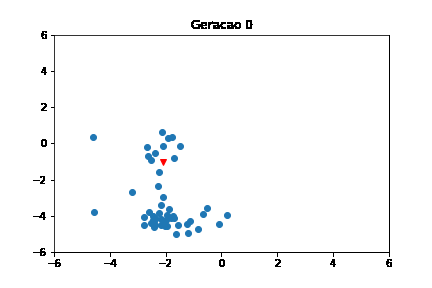

In [348]:
from IPython.display import Image
display(Image(data=open('mygif.gif','rb').read(), format='png'))

In [349]:
bestSwarm.gbest

[-0.005899658856505785, 0.005907908113422788]

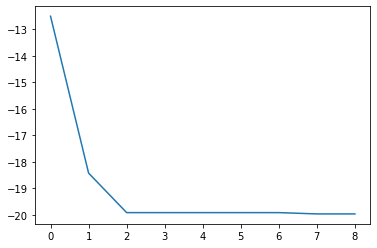

In [351]:
plt.plot(bestSwarm.valueFunction[1:10])